In [8]:
import cx_Oracle as co
con = co.connect('bi/f123f123bb@172.24.2.163/dbbi')
cur = con.cursor()
cur.execute('select * from dba_db_links')
db_links = cur.fetchall()


TypeError: function takes at least 2 arguments (0 given)

In [12]:
import pandas as pd
dataset = pd.read_sql('select * from fat_vendas_cupom',con=con)
dataset

,COD_LOCAL_ABASTECIMENTO,COD_DIA,COD_PDV,QTD_CUPOM,VAL_TOTAL
0,2,2014-07-08,8,274,8217.39
1,2,2014-07-08,3,256,4919.63
2,2,2014-07-13,8,333,10355.71
3,2,2014-07-13,4,265,5436.52
4,2,2014-07-11,8,288,9749.86
...,...,...,...,...,...
2373532,303,2020-09-29,6,242,13581.45
2373533,303,2020-09-29,7,108,7287.97
2373534,303,2020-09-29,8,104,8046.35
2373535,303,2020-09-29,9,37,5914.24


In [27]:
data = dataset[['COD_DIA','QTD_CUPOM','VAL_TOTAL']]

In [51]:
data['MY'] = data.COD_DIA.dt.to_period('m')

In [61]:
data_grouped = data.groupby('MY').agg('sum')

In [70]:
import seaborn as sns
data_grouped.reset_index(inplace=True)
data_grouped

,index,MY,QTD_CUPOM,VAL_TOTAL
0,0,2010-01,4486776,1.028200e+08
1,1,2010-02,4207610,9.934261e+07
2,2,2010-03,4637484,1.099285e+08
3,3,2010-04,4284908,1.041073e+08
4,4,2010-05,4796690,1.180817e+08
...,...,...,...,...
125,125,2020-06,3052374,1.662235e+08
126,126,2020-07,3176723,1.762141e+08
127,127,2020-08,3213326,1.821962e+08
128,128,2020-09,3165963,1.773199e+08


In [116]:
data_grouped

,index,MY,QTD_CUPOM,VAL_TOTAL
0,0,2010-01,4486776,1.028200e+08
1,1,2010-02,4207610,9.934261e+07
2,2,2010-03,4637484,1.099285e+08
3,3,2010-04,4284908,1.041073e+08
4,4,2010-05,4796690,1.180817e+08
...,...,...,...,...
125,125,2020-06,3052374,1.662235e+08
126,126,2020-07,3176723,1.762141e+08
127,127,2020-08,3213326,1.821962e+08
128,128,2020-09,3165963,1.773199e+08


In [76]:
sns.lineplot(data=data_grouped,x='MY',y='QTD_CUPOM')

TypeError: float() argument must be a string or a number, not &#39;Period&#39;

In [117]:
data['MONTH'] = data.COD_DIA.dt.month
data['YEAR'] = data.COD_DIA.dt.year

In [144]:
data.sort_values(by='COD_DIA',inplace=True)
data_wide = data.groupby(['YEAR','MONTH']).sum().reset_index().pivot('MONTH','YEAR','QTD_CUPOM')
data_wide

YEAR,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
MONTH,,,,,,,,,,,
1,4486776.0,4164333.0,4154826.0,4101778.0,5301015.0,5022425.0,4876347.0,4175951.0,3964929.0,3874189.0,3616203.0
2,4207610.0,2656194.0,3988740.0,3797577.0,4919096.0,4581890.0,4612991.0,4018781.0,3666146.0,3560995.0,3483940.0
3,4637484.0,3734179.0,4234925.0,4223684.0,5415028.0,4932962.0,4635811.0,4339062.0,4079362.0,4014853.0,3655451.0
4,4284908.0,4327138.0,4179098.0,3853034.0,5322036.0,5030421.0,4568865.0,4447480.0,3815076.0,3851929.0,3310941.0
5,4796690.0,4075003.0,4075979.0,4036850.0,5302367.0,5017156.0,4573943.0,4411179.0,3897667.0,3932467.0,3242284.0
6,4709794.0,4157006.0,4000418.0,5272892.0,5183044.0,4807460.0,4384828.0,4359865.0,3805352.0,3864910.0,3052374.0
7,4906485.0,4558188.0,4265424.0,5419552.0,5299458.0,4995364.0,4620429.0,4548368.0,3943968.0,3818957.0,3176723.0
8,4875968.0,4427004.0,4270538.0,5446572.0,5278631.0,5067654.0,4497399.0,4387811.0,3900081.0,3813548.0,3213326.0
9,4680263.0,4262783.0,4201921.0,5266512.0,5037194.0,4902144.0,4362237.0,4401781.0,3866468.0,3660569.0,3165963.0


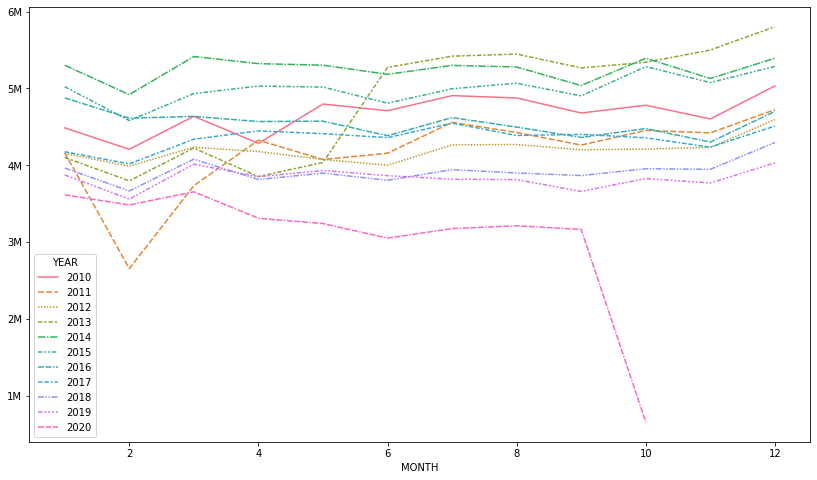

In [150]:
import matplotlib.ticker as ticker
ax=sns.lineplot(data=data_wide)
ax.figure.set_size_inches(14,8)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))


In [131]:
data_grouped=data[['MY','QTD_CUPOM']].groupby('MY').sum('QTD_CUPOM').reset_index()
data_grouped


,MY,QTD_CUPOM
0,2010-01,4486776
1,2010-02,4207610
2,2010-03,4637484
3,2010-04,4284908
4,2010-05,4796690
...,...,...
125,2020-06,3052374
126,2020-07,3176723
127,2020-08,3213326
128,2020-09,3165963


In [137]:
ax = sns.barplot(data=data_grouped[data_grouped.MY.dt.year>=2016],x='MY',y='QTD_CUPOM')
ax.figure.set_size_inches(80,16)

TypeError: float() argument must be a string or a number, not &#39;Period&#39;

&lt;AxesSubplot:&gt;

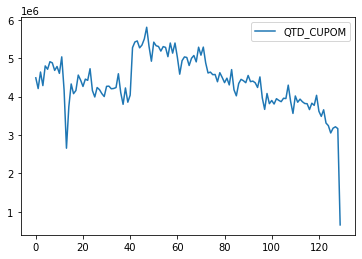

In [138]:
data_grouped.plot()